In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("titanic_train.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

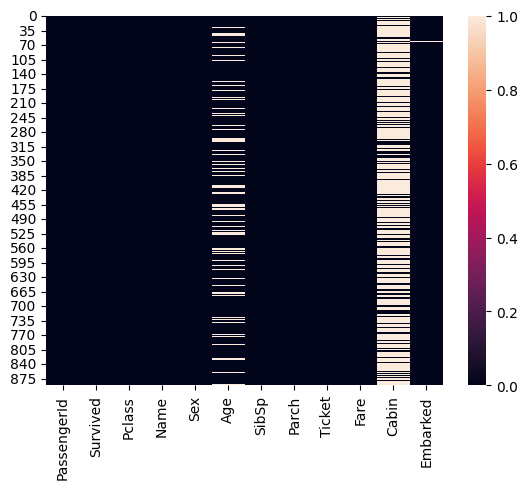

In [5]:
sns.heatmap(df.isnull())

<AxesSubplot:xlabel='Survived', ylabel='count'>

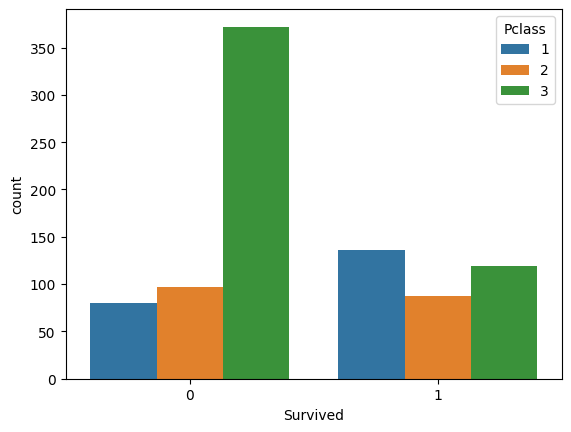

In [11]:
sns.countplot(x = df["Survived"], hue="Pclass", data = df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

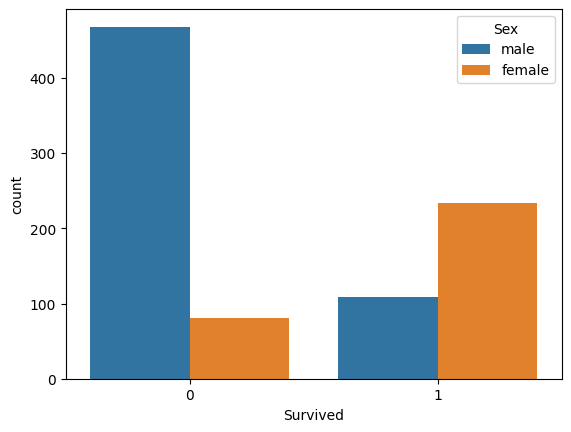

In [12]:
sns.countplot(x = df["Survived"], hue="Sex", data = df)

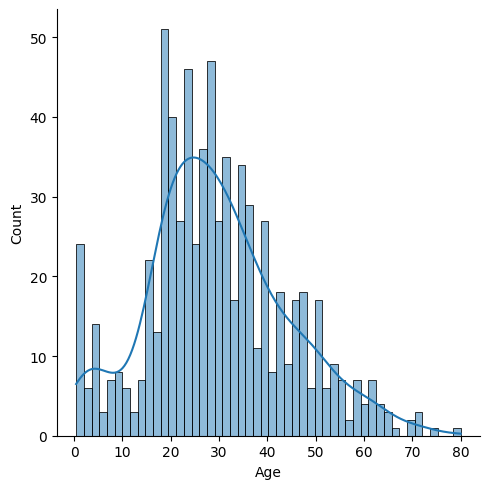

In [17]:
sns.displot(x = df["Age"].dropna(), kde = True, bins = 50)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

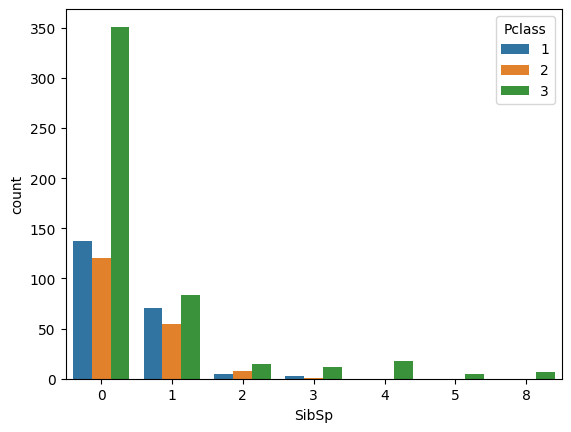

In [22]:
sns.countplot(x = df["SibSp"], hue="Pclass", data = df)

### Missing Data

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

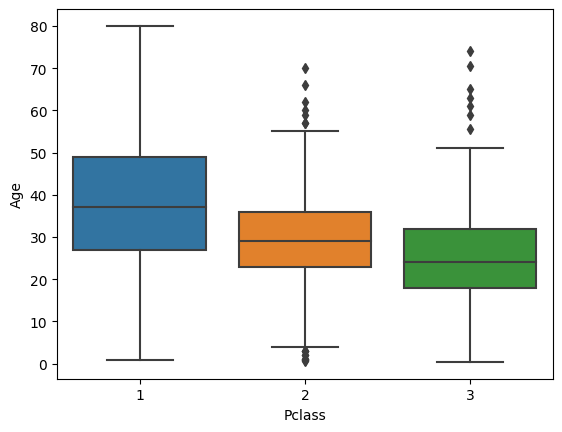

In [23]:
sns.boxplot(x = "Pclass", y = "Age", data= df)

In [24]:
def getMissingAge(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 3:
            return 24
        elif Pclass == 2:
            return 29
        else:
            return 37
    else:
        return Age

In [27]:
df["Age"] = df[["Age", "Pclass"]].apply(getMissingAge, axis=1)

<AxesSubplot:>

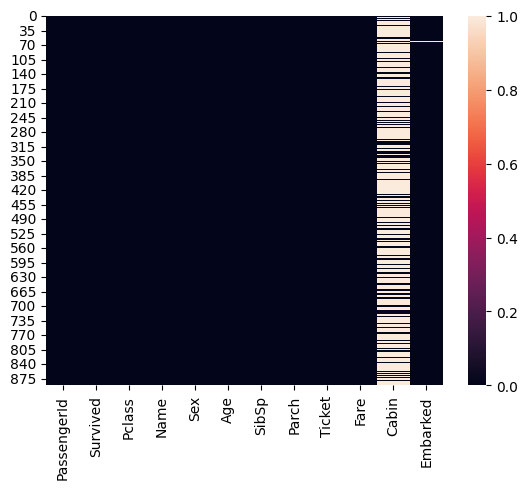

In [28]:
sns.heatmap(df.isnull())

In [29]:
df.drop("Cabin", axis=1, inplace=True)

In [31]:
df.dropna(inplace=True)

In [32]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,26.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


## Get dummies

In [35]:
df["Sex"] = pd.get_dummies(df["Sex"], drop_first=True)

In [39]:
embarkeddf = pd.get_dummies(df["Embarked"], drop_first=True)

In [40]:
df = pd.concat([df, embarkeddf], axis=1)

In [42]:
df.drop("Embarked", axis=1, inplace=True)

In [44]:
df.drop("Name", axis=1, inplace=True)

## Ticket

In [54]:
df.drop("Ticket", axis=1, inplace=True)

<AxesSubplot:xlabel='S', ylabel='Fare'>

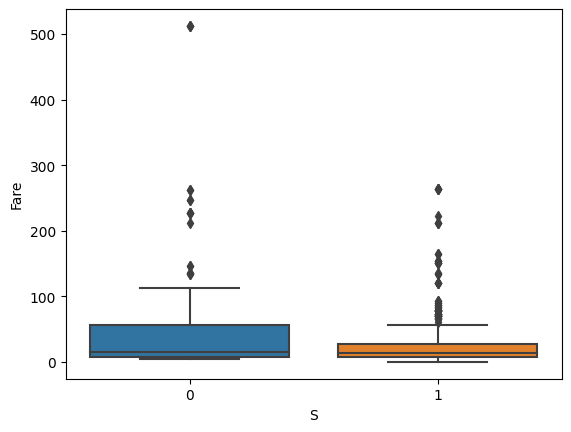

In [57]:
sns.boxplot(x = 'S', y = "Fare", data = df)

In [58]:
df.drop("PassengerId", axis=1, inplace=True)

In [60]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,1,22.0,1,0,7.2500,0,1
1,1,1,0,38.0,1,0,71.2833,0,0
2,1,3,0,26.0,0,0,7.9250,0,1
3,1,1,0,35.0,1,0,53.1000,0,1
4,0,3,1,35.0,0,0,8.0500,0,1


<AxesSubplot:>

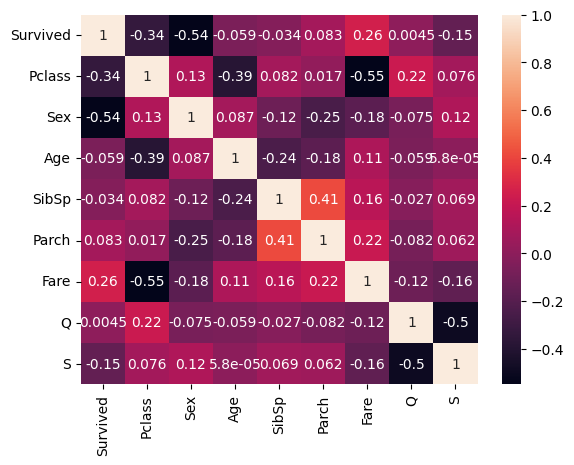

In [62]:
sns.heatmap(df.corr(), annot=True)

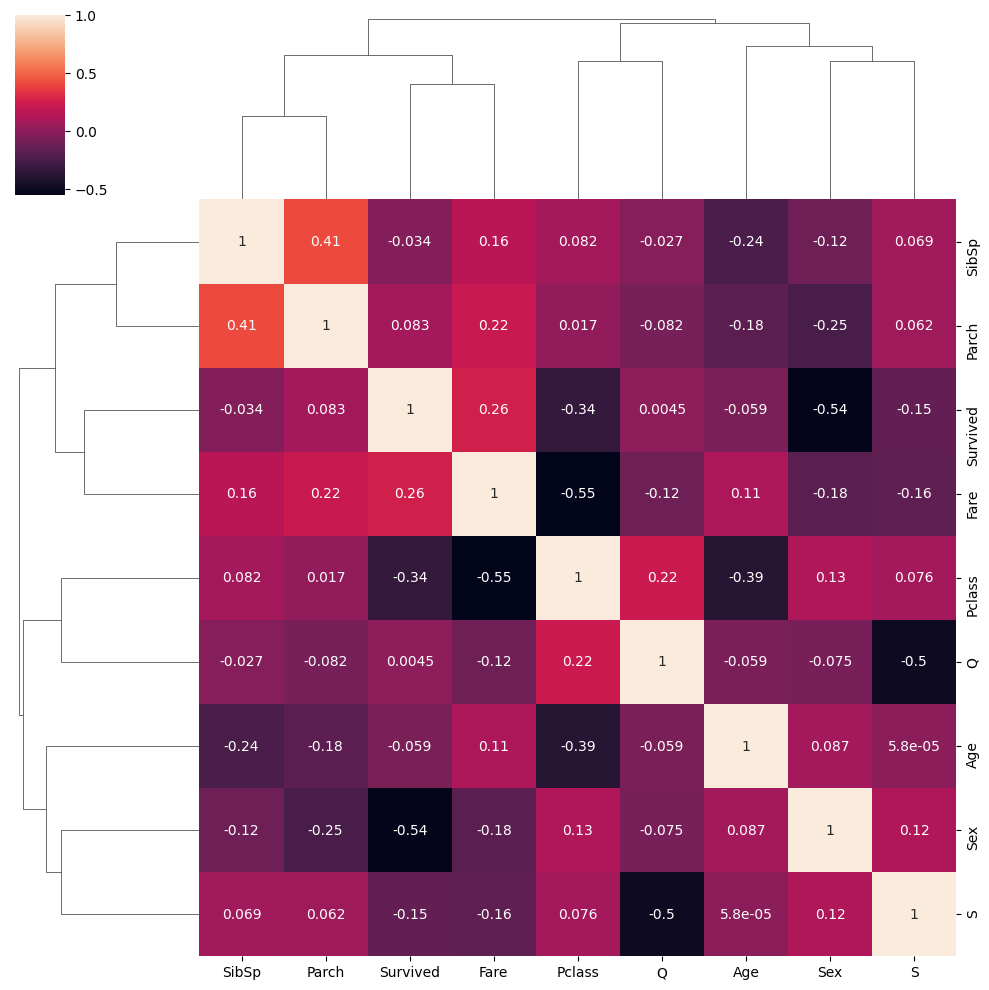

In [64]:
sns.clustermap(df.corr(), annot= True)

In [65]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,1,22.0,1,0,7.2500,0,1
1,1,1,0,38.0,1,0,71.2833,0,0
2,1,3,0,26.0,0,0,7.9250,0,1
3,1,1,0,35.0,1,0,53.1000,0,1
4,0,3,1,35.0,0,0,8.0500,0,1


## Model Creation

In [66]:
logModel = LogisticRegression(n_jobs=300)

In [67]:
X = df.drop("Survived", axis=1)
y = df["Survived"]

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [70]:
logModel.fit(X_train, y_train)

LogisticRegression(n_jobs=300)

In [71]:
predictions = logModel.predict(X_test)

In [75]:
np.mean(predictions != y_test)

0.20224719101123595

In [77]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       167
           1       0.72      0.75      0.74       100

    accuracy                           0.80       267
   macro avg       0.78      0.79      0.79       267
weighted avg       0.80      0.80      0.80       267



In [78]:
print(metrics.confusion_matrix(y_test, predictions))

[[138  29]
 [ 25  75]]


In [79]:
print(metrics.explained_variance_score(y_test, predictions))

0.13760479041916163


<AxesSubplot:xlabel='Survived', ylabel='count'>

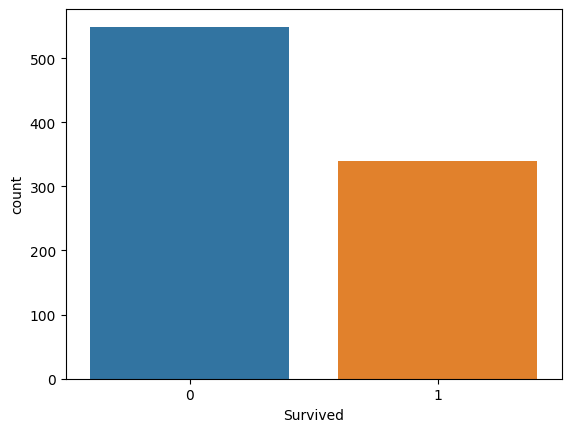

In [80]:
sns.countplot(x = df["Survived"])